# Imports & Libraries

In [ ]:
!pip install deepface
!pip install -U gdown


In [ ]:
import gdown, os, glob, cv2
from matplotlib import pyplot as plt
from deepface import DeepFace

# Download Test Photos

In [ ]:
# --- Google-Drive FOLDER URLs (public-access links) -----------------
profiles_url  = "https://drive.google.com/drive/folders/1oKEAmp5RblnDCJerXlITVU4FSpJFekkU"
reactions_url = "https://drive.google.com/drive/folders/1-EFFsxt51zseN_idqIfhs7vmSQBB262L"

# --- Local destinations --------------------------------------------
profiles_dir  = "/content/Profiles"      # choose any scratch path
reactions_dir = "/content/Reactions"

# --- Download -------------------------------------------------------
gdown.download_folder(url=profiles_url,  output=profiles_dir,  quiet=False, use_cookies=False)
gdown.download_folder(url=reactions_url, output=reactions_dir, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1-jUUf7pDhQ6h33M-MPCTrslX0_aVlLlg AbdulazizProfile.png
Processing file 1-Xn0OMpyIoWyyOnY59unczH-NVX-rc2u AlOrfProfile.png
Processing file 1-isEJqQ_rKvlW20ZF2yfIkSbZGjhO0_Z BaleidProfile.png
Processing file 1-OJtLpu9Y3ktxBtotBF6ruhWkxzY2J71 OmarProfile.png
Processing file 1-NufnVWgkV_GowjKD8gmcR_xv8ZZjvbu SultanProfile.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-jUUf7pDhQ6h33M-MPCTrslX0_aVlLlg
To: /content/Profiles/AbdulazizProfile.png
100%|██████████| 271k/271k [00:00<00:00, 83.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Xn0OMpyIoWyyOnY59unczH-NVX-rc2u
To: /content/Profiles/AlOrfProfile.png
100%|██████████| 279k/279k [00:00<00:00, 89.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-isEJqQ_rKvlW20ZF2yfIkSbZGjhO0_Z
To: /content/Profiles/BaleidProfile.png
100%|██████████| 265k/265k [00:00<00:00, 76.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-OJtLpu9Y3ktxBtotBF6ruhWkxzY2J71
To: /content/Profiles/OmarProfile.png
100%|██████████| 313k/313k [00:00<00:00, 70.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-NufnVWgkV_GowjKD8gmcR_xv8ZZjvbu
To: /content/Profiles/SultanProfile.png
100%|██████████| 330k/330k [00:00<00:00, 64.4MB/s]
Download c

Processing file 1-z_DenIQ3OI-GAz9TkQf-CLqV9anW4ln AbdulazizHappy.png
Processing file 1-uxaiDjPbAbzamdhf9pfiQN_ngSSZCTi AlOrfHappy.png
Processing file 1-rvb_i922bTkB1XHqUxDp3l7ZY-CBU4L BaleidHappy.png
Processing file 102udvx-tu8XeN3fWUcTwdmZ1H0m3_SfB BaleidHappyAgain.png
Processing file 10ACTc5knlOB0LTrnEZTgSQpqoySWH9yE OmarHappy.png
Processing file 1-zX_u1MtLopTYUp-MvbvlLuD5DjAlTGN SultanHappy.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-z_DenIQ3OI-GAz9TkQf-CLqV9anW4ln
To: /content/Reactions/AbdulazizHappy.png
100%|██████████| 48.7k/48.7k [00:00<00:00, 53.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-uxaiDjPbAbzamdhf9pfiQN_ngSSZCTi
To: /content/Reactions/AlOrfHappy.png
100%|██████████| 86.5k/86.5k [00:00<00:00, 56.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-rvb_i922bTkB1XHqUxDp3l7ZY-CBU4L
To: /content/Reactions/BaleidHappy.png
100%|██████████| 99.4k/99.4k [00:00<00:00, 52.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=102udvx-tu8XeN3fWUcTwdmZ1H0m3_SfB
To: /content/Reactions/BaleidHappyAgain.png
100%|██████████| 60.6k/60.6k [00:00<00:00, 59.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=10ACTc5knlOB0LTrnEZTgSQpqoySWH9yE
To: /content/Reactions/OmarHappy.png
100%|██████████| 92.4k/92.4k [00:00<00:00, 26.5MB/s]


['/content/Reactions/AbdulazizHappy.png',
 '/content/Reactions/AlOrfHappy.png',
 '/content/Reactions/BaleidHappy.png',
 '/content/Reactions/BaleidHappyAgain.png',
 '/content/Reactions/OmarHappy.png',
 '/content/Reactions/SultanHappy.png']

# The Medtod of FaceRecogintion


In [27]:
IMG_EXT       = (".jpg", ".jpeg", ".png", ".bmp", ".webp")
MODEL_NAME    = "ArcFace"
BACKENDS      = ["retinaface_r50", "retinaface", "mediapipe", "mtcnn"]

# ╔══════════════════════════════════════════════════════════════════╗
# 4.  Helper: compare two images, trying several detectors           ║
# ╚══════════════════════════════════════════════════════════════════╝

def show_and_compare(profile_path, reaction_path, plot=False):
    img1, img2 = cv2.imread(profile_path), cv2.imread(reaction_path)
    if img1 is None or img2 is None:
        print("❌ OpenCV couldn’t read one of the files"); return None

    for backend in BACKENDS:
        try:
            CUSTOM_T=0.6
            res = DeepFace.verify(
                    img1_path=profile_path,
                    img2_path=reaction_path,
                    model_name=MODEL_NAME,
                    detector_backend=backend,
                    enforce_detection=True,
                    align=True
                  )
            used_backend = backend
            break           # face detected ⇒ stop looping
        except ValueError:   # no face with this backend
            continue
    else:
        print("🤷‍♂️  No face found in one of the images"); return None

    if plot:
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)); plt.axis("off"); plt.title("Profile")
        plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)); plt.axis("off"); plt.title("Reaction")
        plt.suptitle(f"Backend: {used_backend} • Same? {res['verified']}")
        plt.show()

    res["verified_custom"] = res["distance"] <= CUSTOM_T
    verdict = "✅ SAME" if res["verified_custom"] else "❌ DIFF"
    print(f"{os.path.basename(profile_path)} ↔ {os.path.basename(reaction_path)}  →  {verdict}")
    print("----------\n")
    return res

# Testing

5 profile(s) × 6 reaction(s)


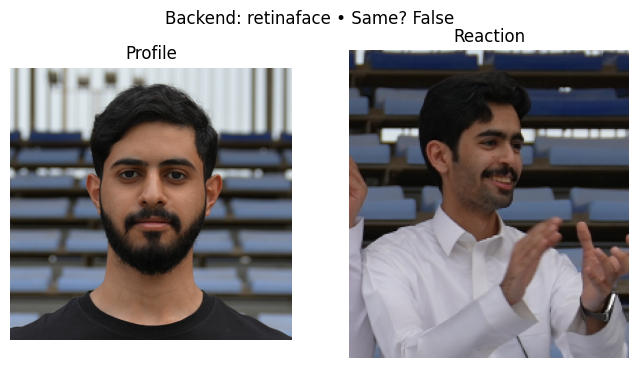

AbdulazizProfile.png ↔ AlOrfHappy.png  →  ❌ DIFF
----------



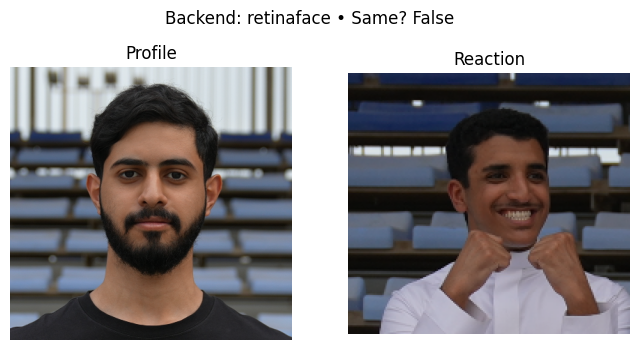

AbdulazizProfile.png ↔ BaleidHappyAgain.png  →  ❌ DIFF
----------



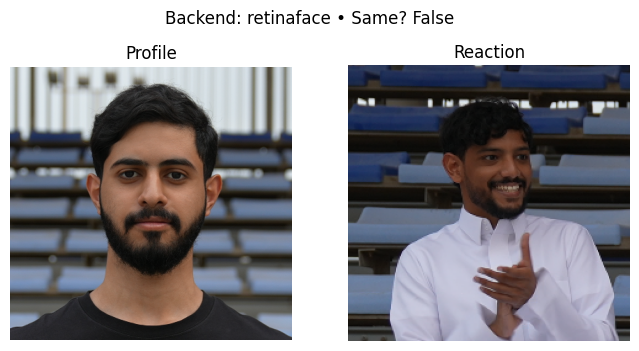

AbdulazizProfile.png ↔ OmarHappy.png  →  ❌ DIFF
----------



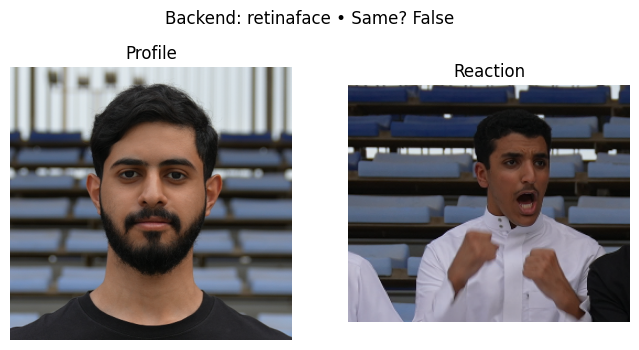

AbdulazizProfile.png ↔ BaleidHappy.png  →  ❌ DIFF
----------



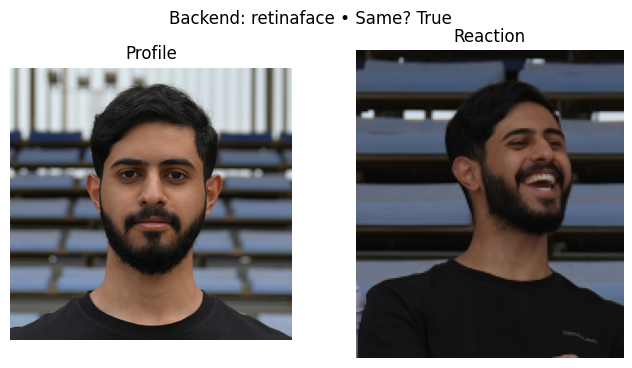

AbdulazizProfile.png ↔ AbdulazizHappy.png  →  ✅ SAME
----------



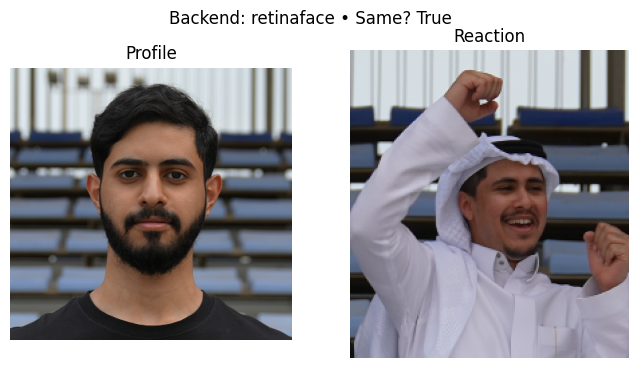

AbdulazizProfile.png ↔ SultanHappy.png  →  ❌ DIFF
----------



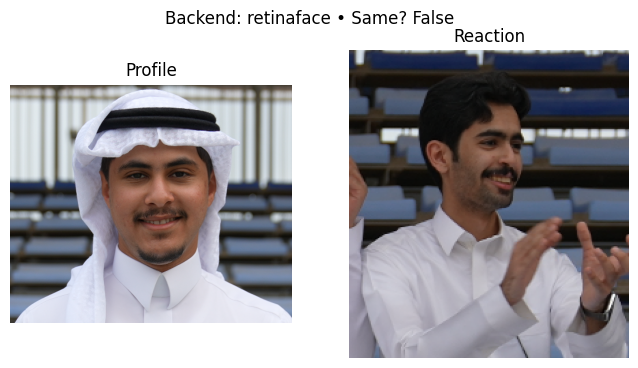

SultanProfile.png ↔ AlOrfHappy.png  →  ❌ DIFF
----------



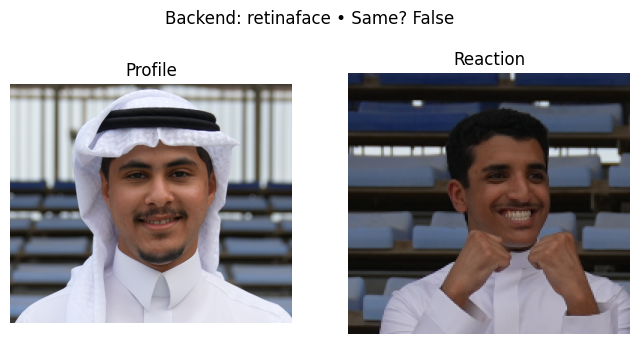

SultanProfile.png ↔ BaleidHappyAgain.png  →  ❌ DIFF
----------



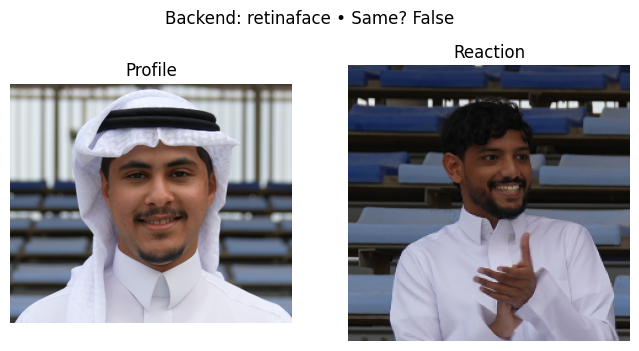

SultanProfile.png ↔ OmarHappy.png  →  ❌ DIFF
----------



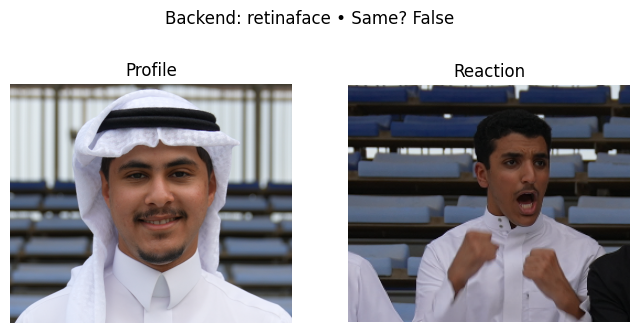

SultanProfile.png ↔ BaleidHappy.png  →  ❌ DIFF
----------



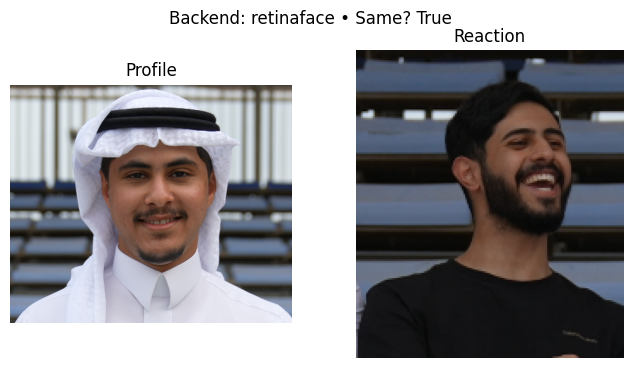

SultanProfile.png ↔ AbdulazizHappy.png  →  ❌ DIFF
----------



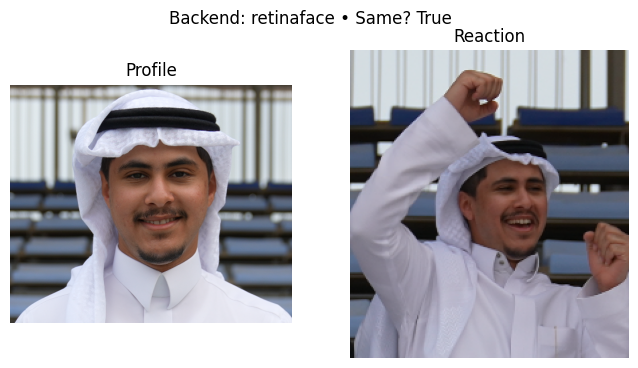

SultanProfile.png ↔ SultanHappy.png  →  ✅ SAME
----------



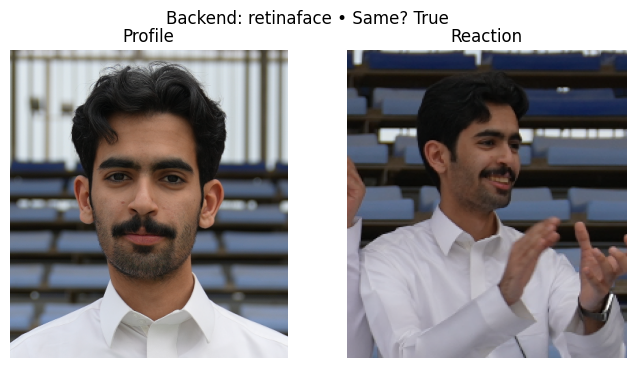

AlOrfProfile.png ↔ AlOrfHappy.png  →  ✅ SAME
----------



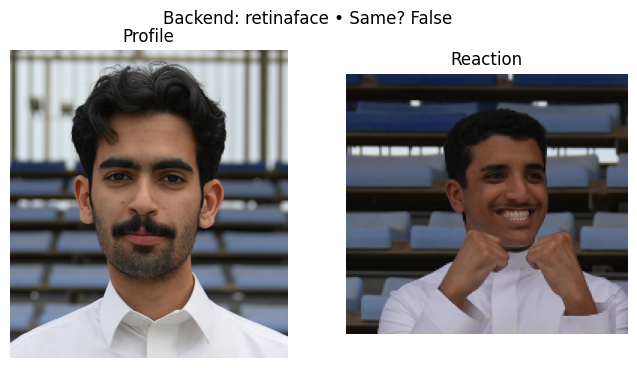

AlOrfProfile.png ↔ BaleidHappyAgain.png  →  ❌ DIFF
----------



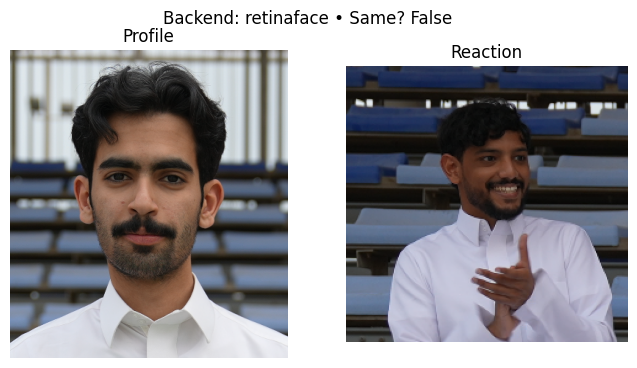

AlOrfProfile.png ↔ OmarHappy.png  →  ❌ DIFF
----------



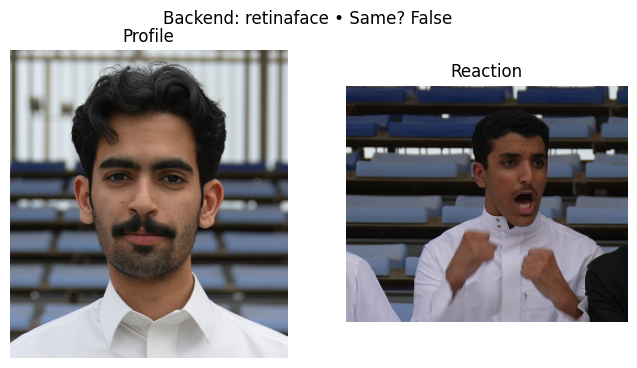

AlOrfProfile.png ↔ BaleidHappy.png  →  ❌ DIFF
----------



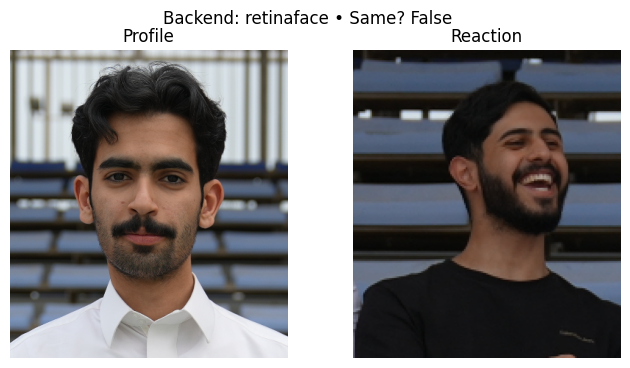

AlOrfProfile.png ↔ AbdulazizHappy.png  →  ❌ DIFF
----------



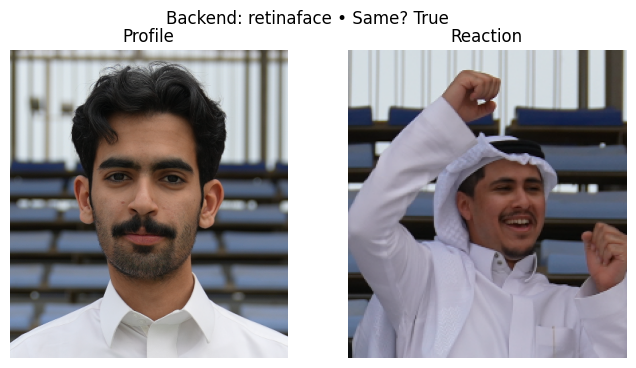

AlOrfProfile.png ↔ SultanHappy.png  →  ❌ DIFF
----------



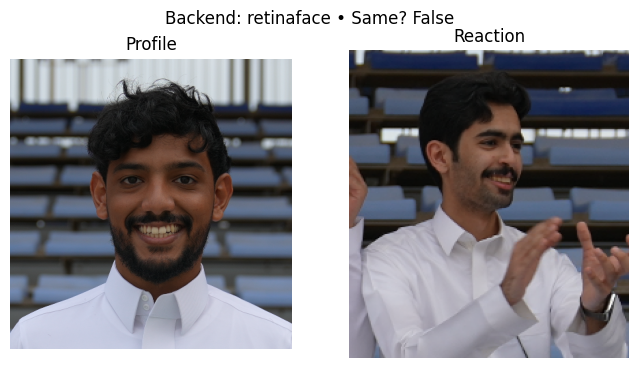

OmarProfile.png ↔ AlOrfHappy.png  →  ❌ DIFF
----------



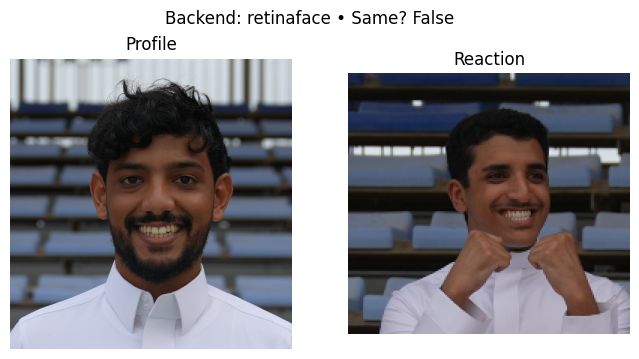

OmarProfile.png ↔ BaleidHappyAgain.png  →  ❌ DIFF
----------



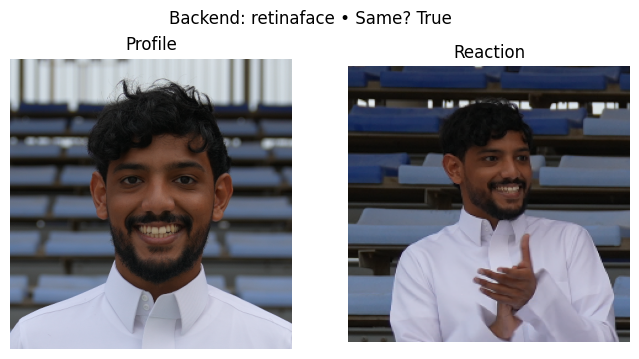

OmarProfile.png ↔ OmarHappy.png  →  ✅ SAME
----------



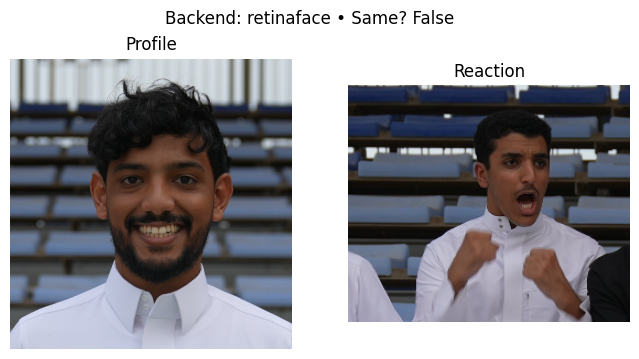

OmarProfile.png ↔ BaleidHappy.png  →  ❌ DIFF
----------



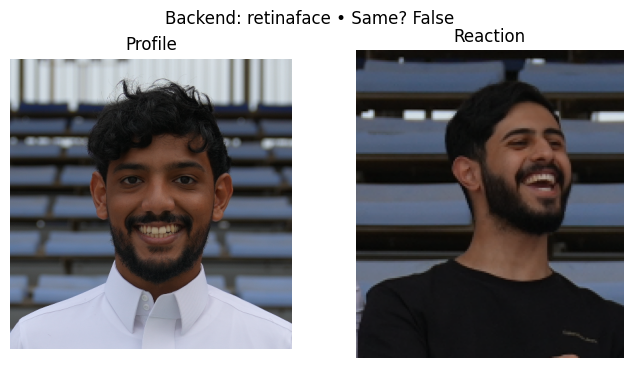

OmarProfile.png ↔ AbdulazizHappy.png  →  ❌ DIFF
----------



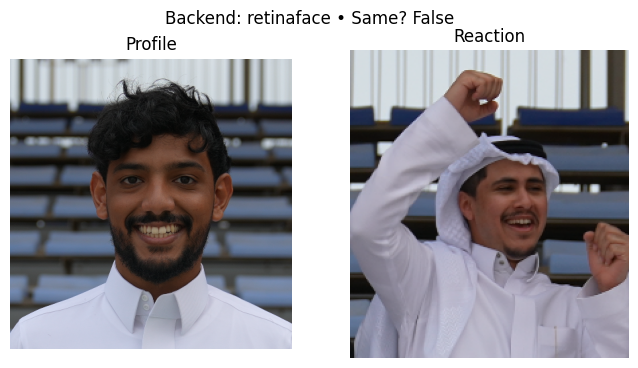

OmarProfile.png ↔ SultanHappy.png  →  ❌ DIFF
----------



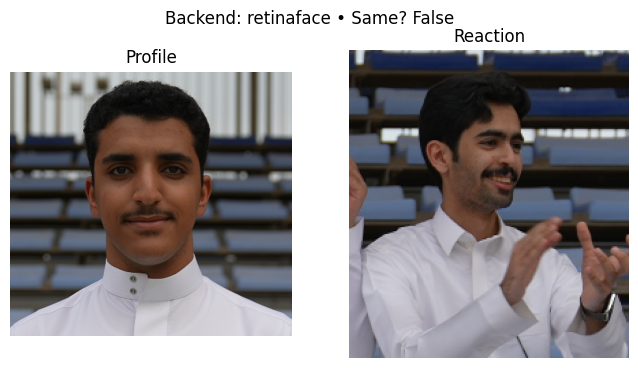

BaleidProfile.png ↔ AlOrfHappy.png  →  ❌ DIFF
----------



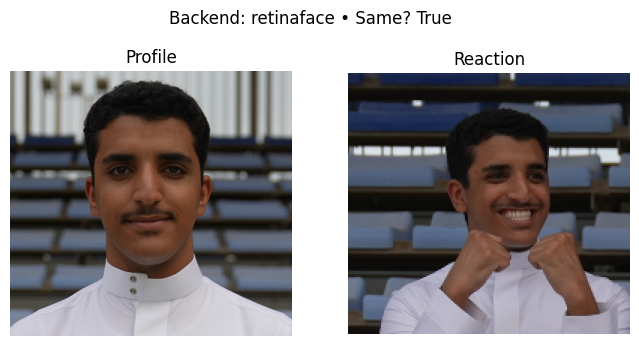

BaleidProfile.png ↔ BaleidHappyAgain.png  →  ✅ SAME
----------



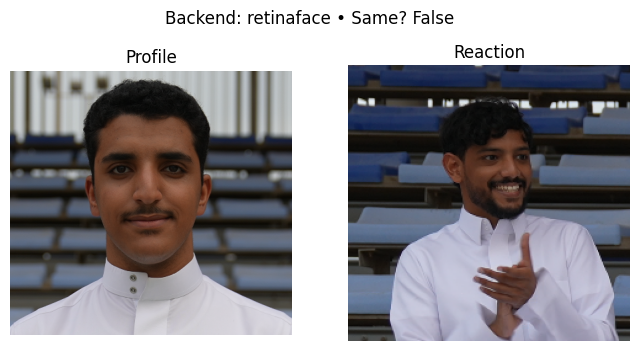

BaleidProfile.png ↔ OmarHappy.png  →  ❌ DIFF
----------



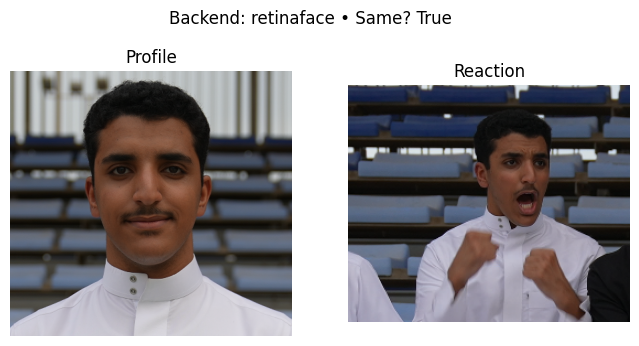

BaleidProfile.png ↔ BaleidHappy.png  →  ✅ SAME
----------



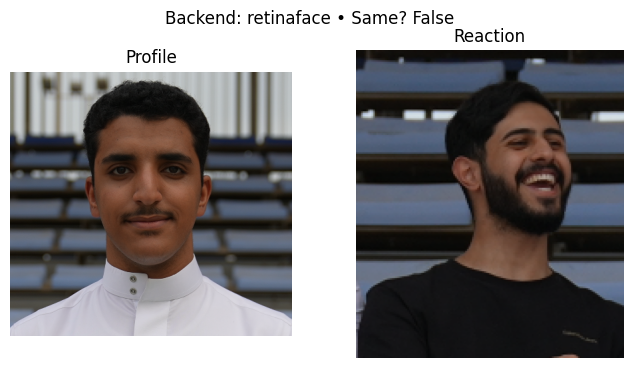

BaleidProfile.png ↔ AbdulazizHappy.png  →  ❌ DIFF
----------



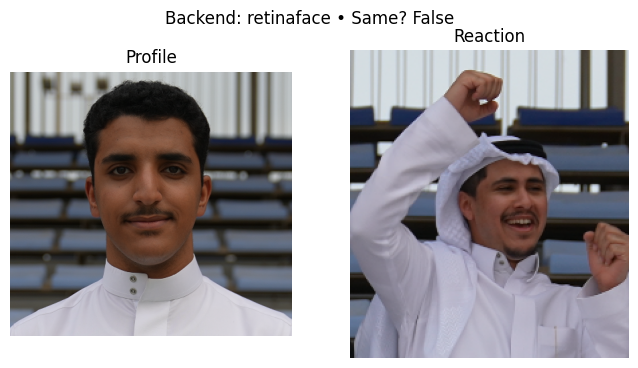

BaleidProfile.png ↔ SultanHappy.png  →  ❌ DIFF
----------



In [28]:
profiles  = [os.path.join(profiles_dir,  f) for f in os.listdir(profiles_dir)  if f.lower().endswith(IMG_EXT)]
reactions = [os.path.join(reactions_dir, f) for f in os.listdir(reactions_dir) if f.lower().endswith(IMG_EXT)]

print(f"{len(profiles)} profile(s) × {len(reactions)} reaction(s)")

# ╔══════════════════════════════════════════════════════════════════╗
# 5.  Run all comparisons                                            ║
# ╚══════════════════════════════════════════════════════════════════╝
for p in profiles:
    for r in reactions:
        show_and_compare(p, r, plot=True)   # flip to True if you want to see each pair